In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

import keras
print (keras.__version__)

%matplotlib inline
sns.set(style="white")

Using TensorFlow backend.


2.1.4


In [2]:
# Configuration 

# Data sources
include_bitcoin = 1
include_ethereum = 1
include_litecoin = 0
include_goog_trends = 1
include_stocktwits = 1

# Data duration (training + test)
start_date_ = '2015-08-07'
start_date = "20150807"
end_date = "20180412"

split_date = '2018-02-02
# split_date = '2018-01-12'  # 10% of full dataset


# Target
# target = 'btc_daily_ret'
target = 'btc_volatility'

# target = 'eth_daily_ret'
# target = 'eth_volume'
# target = 'eth_Close'

# how many days in advance ?


# Algorithm (LSTM - tune with GridSearch and sklearn's TimeSeriesSplit)
# window_size = 10
# how many days in advance

coins = ['bitcoin', 'ethereum', 'litecoin', 'ripple']
coin_symbol = {'bitcoin': 'btc', 'ethereum': 'eth', 'litecoin': 'ltc', 'ripple': 'xrp'}


In [3]:
# Load dataset
dataset_df = pd.read_pickle("data/full_dataset.pkl")

In [4]:
dataset_df.head()

,Date,btc_Open,btc_High,btc_Low,btc_Close,btc_Volume,btc_Market Cap,eth_Open,eth_High,eth_Low,...,ltc_close_off_high,ltc_volatility,ltc_daily_ret,xrp_close_off_high,xrp_volatility,xrp_daily_ret,bitcoin_trends,ethereum_trends,litecoin_trends,ripple_trends
0,2015-08-07,278.74,280.39,276.37,279.58,42484800,4032820000,2.830000,3.540000,2.520000,...,0.920000,0.061576,0.036946,0.987805,0.020449,0.016459,33,47,35,69
1,2015-08-08,279.74,279.93,260.71,261.00,58533000,4048270000,2.790000,2.800000,0.714725,...,-0.947368,0.090047,-0.087678,0.147059,0.066634,0.038217,29,43,57,72
2,2015-08-09,261.12,267.00,260.47,265.08,23789600,3779770000,0.706136,0.879810,0.629191,...,0.058824,0.044271,0.015625,0.914530,0.041372,0.038190,30,45,30,71
3,2015-08-10,265.48,267.03,262.60,264.47,20979400,3843850000,0.713989,0.729854,0.636546,...,0.250000,0.020513,0.012821,-0.949686,0.018044,-0.007036,31,35,55,73
4,2015-08-11,264.34,270.39,264.09,270.39,25433900,3828500000,0.708087,1.130000,0.663235,...,1.000000,0.055696,0.053165,-1.000000,0.019998,-0.018284,32,37,36,63


In [5]:
dataset_df.describe()

,btc_Open,btc_High,btc_Low,btc_Close,btc_Volume,btc_Market Cap,eth_Open,eth_High,eth_Low,eth_Close,...,btc_daily_ret,eth_close_off_high,eth_volatility,eth_daily_ret,ltc_close_off_high,ltc_volatility,ltc_daily_ret,xrp_close_off_high,xrp_volatility,xrp_daily_ret
count,980.000000,980.000000,980.000000,980.000000,9.800000e+02,9.800000e+02,980.000000,980.000000,980.000000,980.000000,...,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,2799.266051,2906.104551,2680.363153,2806.535061,1.843450e+09,4.645561e+10,171.353855,179.303338,162.530315,171.780020,...,0.004009,0.043437,0.093589,0.008121,0.016137,0.063426,0.004761,-0.075330,0.074460,0.008013
std,3967.730832,4149.260772,3741.780966,3969.698130,3.743145e+09,6.683607e+10,279.926128,293.623513,263.802084,279.906146,...,0.041299,0.590083,0.080554,0.078051,0.603068,0.071212,0.063707,0.656202,0.117797,0.097306
min,210.070000,226.320000,199.570000,210.500000,1.271260e+07,3.053250e+09,0.431589,0.482988,0.420897,0.434829,...,-0.185897,-1.000000,0.006512,-0.729991,-1.000000,0.005038,-0.325438,-1.000000,0.003280,-0.452273
25%,442.485000,448.147500,435.647500,442.610000,6.078130e+07,6.745750e+09,8.227500,8.595000,7.975000,8.262500,...,-0.009140,-0.461322,0.039473,-0.026588,-0.500000,0.018065,-0.016295,-0.671642,0.020137,-0.019957
50%,772.330000,777.540000,765.135000,773.330000,1.332780e+08,1.237835e+10,12.540000,12.900000,12.000000,12.525000,...,0.002887,0.032130,0.070483,-0.000941,0.000000,0.037776,0.000000,-0.166575,0.040083,-0.003530
75%,3371.120000,3529.840000,3265.620000,3390.945000,1.515760e+09,5.560972e+10,292.837500,299.967500,281.355000,293.192500,...,0.018955,0.570978,0.118260,0.034786,0.503795,0.083777,0.016299,0.535524,0.080572,0.018710
max,19475.800000,20089.000000,18974.100000,19497.400000,2.384090e+10,3.261410e+11,1397.480000,1432.880000,1290.600000,1396.420000,...,0.254702,1.000000,0.747410,0.511114,1.000000,0.691388,0.669856,1.000000,2.267527,1.787811


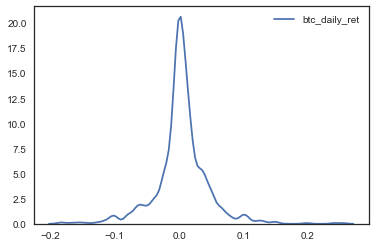

In [6]:
sns.kdeplot(dataset_df['btc_daily_ret'])

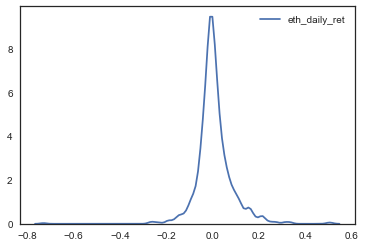

In [7]:
sns.kdeplot(dataset_df['eth_daily_ret'])

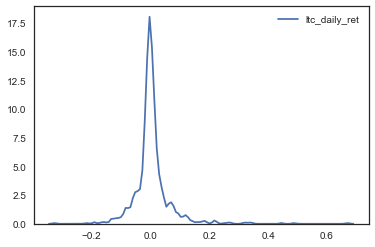

In [8]:
sns.kdeplot(dataset_df['ltc_daily_ret'])

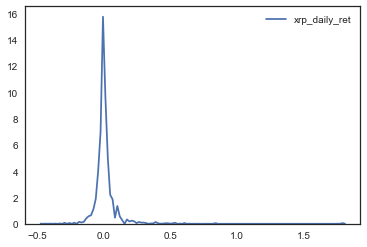

In [9]:
sns.kdeplot(dataset_df['xrp_daily_ret'])

In [10]:
## PERSISTENT MODEL: Benchmark

actual_bitcoin = dataset_df[dataset_df['Date']>= split_date][target].values

# NOTE: ****** Baseline: no change from previous day => pred_bitcoin = 0 (percent change) for persistence model
mae = np.mean(np.absolute((actual_bitcoin)))
mse = np.mean(np.square((actual_bitcoin)))

print(mae)
print(mse)

0.08128175334933165
0.00834403315309096


In [11]:
## LSTM Begins

symbols_ = [symbol+"_" for symbol in list(coin_symbol.values())]

# Ignoring other columns from market data (high correlation to the ones chosen below?)
# TODO: Add google trends data
model_data = dataset_df[['Date']+[symbol+metric for symbol in symbols_ 
                                   for metric in ['Close', 'Volume', 'close_off_high', 'volatility', 'daily_ret']]
                        +[coin+"_trends" for coin in coins]]

model_data.head()

,Date,btc_Close,btc_Volume,btc_close_off_high,btc_volatility,btc_daily_ret,eth_Close,eth_Volume,eth_close_off_high,eth_volatility,...,ltc_daily_ret,xrp_Close,xrp_Volume,xrp_close_off_high,xrp_volatility,xrp_daily_ret,bitcoin_trends,ethereum_trends,litecoin_trends,ripple_trends
0,2015-08-07,279.58,42484800,0.597015,0.014422,0.003014,2.770000,164329,-0.509804,0.360424,...,0.036946,0.008152,363643,0.987805,0.020449,0.016459,33,47,35,69
1,2015-08-08,261.00,58533000,-0.969823,0.068707,-0.066991,0.753325,674188,-0.962979,0.747410,...,-0.087678,0.008476,678295,0.147059,0.066634,0.038217,29,43,57,72
2,2015-08-09,265.08,23789600,0.411945,0.025008,0.015165,0.701897,532170,-0.419789,0.354916,...,0.015625,0.008808,531969,0.914530,0.041372,0.038190,30,45,30,71
3,2015-08-10,264.47,20979400,-0.155756,0.016687,-0.003804,0.708448,405283,0.541175,0.130685,...,0.012821,0.008750,472973,-0.949686,0.018044,-0.007036,31,35,55,73
4,2015-08-11,270.39,25433900,1.000000,0.023833,0.022887,1.070000,1463100,0.742911,0.659192,...,0.053165,0.008591,282461,-1.000000,0.019998,-0.018284,32,37,36,63


In [12]:
training_set, test_set = model_data[model_data['Date']<split_date], model_data[model_data['Date']>=split_date]

# we don't need the date columns anymore
########### DONT'WE ?? - If we are to cross-validation, we need the dates!! or use the index?
training_set = training_set.drop('Date', 1)
test_set = test_set.drop('Date', 1)

In [13]:
window_len = 6 # 25 # 20 10
# Columns to be normalized!!
norm_cols = [[symbol+metric for symbol in symbols_ for metric in ['Close','Volume']]          
             +[coin+"_trends" for coin in coins]]

norm_cols

[['btc_Close',
  'btc_Volume',
  'eth_Close',
  'eth_Volume',
  'ltc_Close',
  'ltc_Volume',
  'xrp_Close',
  'xrp_Volume',
  'bitcoin_trends',
  'ethereum_trends',
  'litecoin_trends',
  'ripple_trends']]

In [14]:
### TODO: Are we dropping the target from inputs ?

LSTM_training_inputs = []
for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_training_inputs.append(temp_set)

# model output is next price normalised to 10th previous closing price
# LSTM_training_outputs = (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1
LSTM_training_outputs = training_set[target][window_len:].values

In [15]:
LSTM_test_inputs = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_test_inputs.append(temp_set)
# LSTM_test_outputs = (test_set['eth_Close'][window_len:].values/test_set['eth_Close'][:-window_len].values)-1
LSTM_test_outputs = test_set[target][window_len:].values

print(len(training_set))
print(len(test_set))

910
70


In [16]:
# ???  easier to work with numpy arrays rather than pandas dataframes
# especially as we now only have numerical data
LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)

LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)

type(LSTM_test_inputs)

numpy.ndarray

In [17]:
import keras
print (keras.__version__)

# import the relevant Keras modules
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.5, loss="mae", optimizer="adam"):
    model = Sequential()

    model.add(LSTM(100, return_sequences=True, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(LSTM(25, return_sequences=True))
    model.add(Dropout(dropout))
    model.add(LSTM(10))
    model.add(Dropout(dropout))
    
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

2.1.4


In [18]:
# random seed for reproducibility
np.random.seed(42)
# initialise model architecture
bt_model = build_model(LSTM_training_inputs, output_size=1, neurons = 100)

# note: bt_history contains information on the training error per epoch
bt_history = bt_model.fit(LSTM_training_inputs, LSTM_training_outputs, 
                            epochs=15, batch_size=1, verbose=2, shuffle=True)

Epoch 1/15
 - 11s - loss: 0.0352
Epoch 2/15
 - 8s - loss: 0.0299
Epoch 3/15
 - 8s - loss: 0.0275
Epoch 4/15
 - 8s - loss: 0.0262
Epoch 5/15
 - 7s - loss: 0.0257
Epoch 6/15
 - 8s - loss: 0.0248
Epoch 7/15
 - 8s - loss: 0.0250
Epoch 8/15
 - 8s - loss: 0.0249
Epoch 9/15
 - 8s - loss: 0.0244
Epoch 10/15
 - 7s - loss: 0.0241
Epoch 11/15
 - 8s - loss: 0.0236
Epoch 12/15
 - 8s - loss: 0.0232
Epoch 13/15
 - 8s - loss: 0.0233
Epoch 14/15
 - 8s - loss: 0.0232
Epoch 15/15
 - 7s - loss: 0.0224


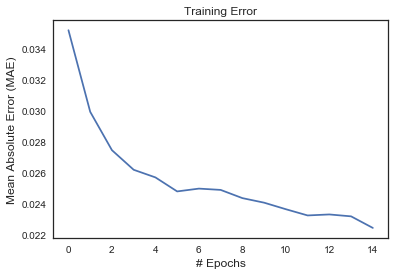

In [19]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(bt_history.epoch, bt_history.history['loss'])
ax1.set_title('Training Error')

if bt_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
# just in case you decided to change the model loss calculation
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

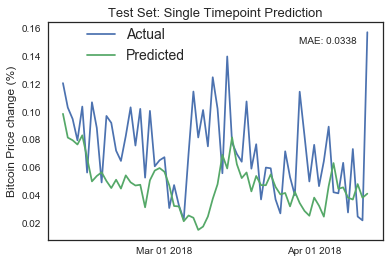

In [20]:
fig, ax1 = plt.subplots(1,1)
LSTM_test_outputs = training_set[target][window_len:].values
ax1.set_xticks([datetime.date(2018,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2018,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         test_set[target][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
         (bt_model.predict(LSTM_test_inputs)), 
         label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs(bt_model.predict(LSTM_test_inputs)-\
            (test_set[target].values[window_len:]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price change (%)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

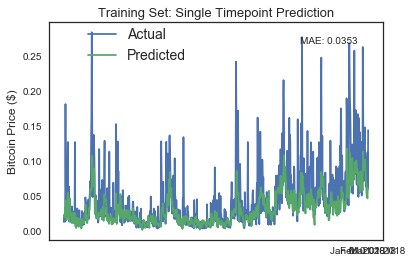

In [21]:
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2018,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2018,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         training_set[target][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
         (bt_model.predict(LSTM_training_inputs)), 
         label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs(bt_model.predict(LSTM_training_inputs)-\
            (training_set[target].values[window_len:]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Training Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

In [22]:
pred_values = bt_model.predict(LSTM_training_inputs)
max(pred_values)
min(pred_values)

array([0.0012781], dtype=float32)